# In Class Assignment 5 - ME 364 (Spring 2022)

<font color='red'>__Question (1)__</font>: Using the Fuel Economy data set that we used in the class, develop a model using `Cmb MPG` and `Air Pollution Score` as features and `Fuel` as the target variable. Make sure to normalize your features.


Split the data into train and test sets, create KNN classifier and train it on the training data, and finally make predictions on both training and test data. Feel free to play around with the distance option and the k value.

In [1]:
import pandas as pd

url = ('https://raw.githubusercontent.com/MasoudMiM/ME_364/main/EPA_Green_Vehicle_Guide/EPA_2020_Fuel_Economy.csv')
df = pd.read_csv(url)           

df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np

# Select features and target
x_data=np.array(df[['Cmb MPG','Air Pollution Score']])  # Feature variables
y_data=df['Fuel']                                       # Target variable

Target variable distribution:
Gasoline    2268
Diesel        40
Name: Fuel, dtype: int64


<AxesSubplot:>

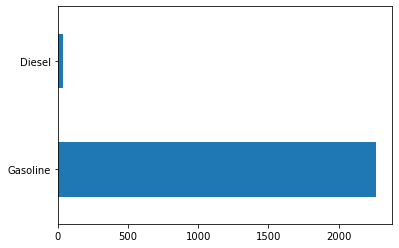

In [4]:
# Check out target variable distribution - note that it is imbalanced
print('Target variable distribution:')
print( df['Fuel'].value_counts() )

df['Fuel'].value_counts().plot(kind='barh')

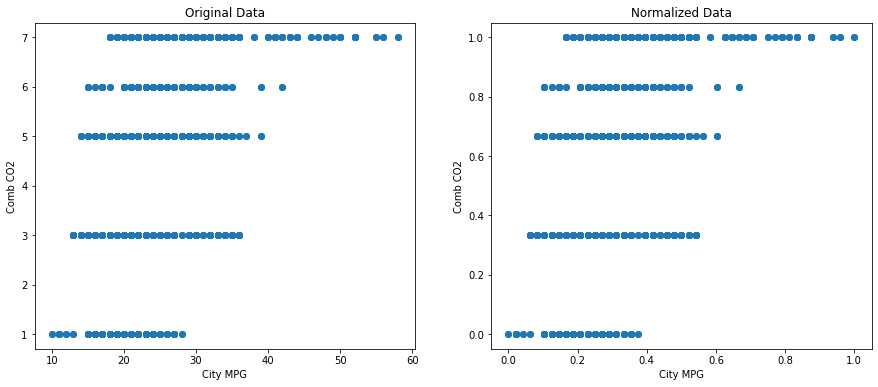

In [6]:
# Normalize feature variables data
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data

# Check out normalized data
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
plt.scatter(x_data[:,0],x_data[:,1])
plt.xlabel('Cmb MPG'),plt.ylabel('Air Pollution Score')
plt.title('Original Data')

fig.add_subplot(1,2,2)
plt.scatter(x_data_scaled[:,0],x_data_scaled[:,1])
plt.xlabel('Cmb MPG'),plt.ylabel('Air Pollution Score')
plt.title('Normalized Data');

In [8]:
# Create training/testing data split
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.2)

# Instantiate KNN classifier
neigh = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')

# Train KNN classifier
neigh.fit(x_train,y_train)

# Make predictions using KNN model
yhatTest = neigh.predict(x_test)
yhatTrain= neigh.predict(x_train)

---

<font color='red'>__Question (2)__</font>: For the model you developed, calculate Jaccard index, F-score, and also plot the confusion matrix.

Write a for loop to evaluate the performance of the model for different values of k and see if you can find a better k value for your KNN classifier (aside from k=1).

accuracy score for training data is 0.986 and accuracy score for test data is 0.985
Jaccard index for training data is 0.973 and Jaccard index for test data is 0.970
F-score for training data is 0.986 and JF-score index for test data is 0.985


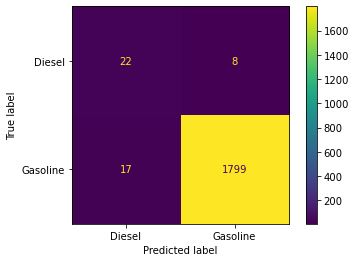

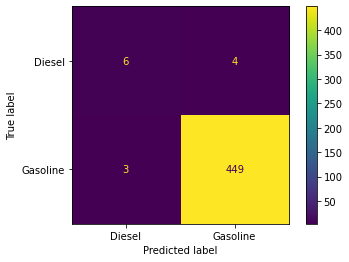

In [20]:
# Evaluate model
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Accuracy
acc_scoreTrain = accuracy_score(y_train,yhatTrain)
acc_scoreTest = accuracy_score(y_test,yhatTest)
print(f'accuracy score for training data is {acc_scoreTrain:0.3f} and accuracy score for test data is {acc_scoreTest:0.3f}')

# Jaccard index
J_scoreTrain = jaccard_score(y_train,yhatTrain, average='micro')
J_scoreTest = jaccard_score(y_test,yhatTest, average='micro')
print(f'Jaccard index for training data is {J_scoreTrain:0.3f} and Jaccard index for test data is {J_scoreTest:.3f}')

# F-score
F_scoreTrain = f1_score(y_train,yhatTrain, average='micro')
F_scoreTest = f1_score(y_test,yhatTest, average='micro')
print(f'F-score for training data is {F_scoreTrain:0.3f} and JF-score index for test data is {F_scoreTest:.3f}')

# Plot training data confusion matrix
CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
dispTr = ConfusionMatrixDisplay(CM_scoreTrain,display_labels=neigh.classes_)
dispTr.plot()

# Plot testing data confusion matrix
CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'
dispTs = ConfusionMatrixDisplay(CM_scoreTest,display_labels=neigh.classes_)
dispTs.plot()

plt.show()

Best K-value by Jaccard index: 3
Best K-value by F-score: 3


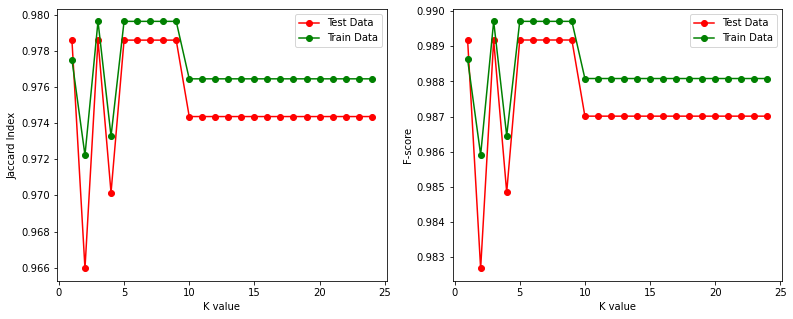

In [37]:
# Try model with different K values
Ks = 25
Jacc_Test = np.zeros((Ks-1))
Jacc_Train= np.zeros((Ks-1))

F_Loop_Test = np.zeros((Ks-1))
F_Loop_Train= np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neighLoop = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatTestLoop  = neighLoop.predict(x_test)
    yhatTrainLoop = neighLoop.predict(x_train)
    Jacc_Test[n-1] = jaccard_score(y_test, yhatTestLoop, average='micro')
    Jacc_Train[n-1] = jaccard_score(y_train, yhatTrainLoop, average='micro')

    F_Loop_Test[n-1] = f1_score(y_test, yhatTestLoop, average='micro')
    F_Loop_Train[n-1] = f1_score(y_train, yhatTrainLoop, average='micro')

best_J = np.argmax(Jacc_Train[1:])+2
best_F = np.argmax(F_Loop_Train[1:])+2

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(range(1,Ks),Jacc_Test,'r-o',range(1,Ks),Jacc_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Jaccard Index');

plt.subplot(1,2,2)
plt.plot(range(1,Ks),F_Loop_Test,'r-o',range(1,Ks),F_Loop_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('F-score');

print(f"Best K-value by Jaccard index: {best_J}")
print(f"Best K-value by F-score: {best_F}")